In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandasql import sqldf

In [27]:
df = pd.read_csv('./maiz.csv', encoding='UTF-8')
df.sample(10)

,FECHA_EMISION,FECHA_ULTIMO_PAGO,PLAZO_APROBADO,DESCRIPCION_PRODUCTO_CREDITO,DESCRIPCION_DESTINO_CREDITO,MONTO_OTORGADO,SALDO_CAPITAL,TASA_EFECTIVA_ANUAL,COBRA_IVA,NOMBRE_ACTIVIDAD_ECONOMICA,DESCRIPCION_ACTIVIDAD
1148194,20160812,20161205,120.0,CREDITO SOLIDARIO,COMPRA DE MERCANCIA,5000.0,0.0,0.0,N,CAMPESINO ...,SIEMBRA DE MAIZ Y HUERTAS DE AGUACATE
2220816,20201211,20201228,17.0,CREDITO GARANTIZADO SOBRE INVERSION ...,OTROS,19300.0,0.0,0.0,N,CAMPESINO ...,"SIEMBRA MAIZ, TOMATE Y CHILE CRIOLLO"
2996011,20220513,20230222,321.0,CREDITO A LA PALABRA,COMPRA CASA,40000.0,0.0,0.0,N,CAMPESINO ...,SIEMBRA DE SORGO Y MAIZ
2036617,20200326,20200804,180.0,CREDITO AL CONSUMO,PAGO DE RENTA NEGOCIO,5000.0,0.0,0.0,Y,CAMPESINO ...,"SIEMBRA DE JITOMATE, TOMATE, MAIZ, CALABAZA, C..."
2058379,20200415,20210310,330.0,CREDITO AGROPECUARIO,COMPRA CASA,7500.0,0.0,0.0,N,CAMPESINO ...,"CAMPESINO CULTIVO DE MAIZ, TRABAJA CON SU TRACTOR"
303287,20130423,20131023,180.0,CREDINEGOCIO,COMPRA DE MERCANCIA,9000.0,0.0,0.0,N,CAMPESINO ...,CULTIVO DE MAIZ
347635,20130620,20131221,180.0,CREDINEGOCIO,COMPRA DE ANIMALES DE TRASPATIO,6000.0,0.0,0.0,N,CAMPESINO ...,PRODUCTOR DE MAIZ.
2945221,20210429,20220222,300.0,CREDITO AGROPECUARIO,COMPRA CASA,9500.0,0.0,0.0,N,CAMPESINO ...,SIEMBRA DE MAIZ ELOTERO VARIEDAD 7573 ASGROW H...
357647,20130624,20131219,180.0,CREDITO AGROPECUARIO,COMPRA INSUMOS,9000.0,0.0,0.0,N,CAMPESINO ...,CULTIVO DE SORGO Y MAIZ
2893999,20200420,20201215,240.0,CREDITO AGROPECUARIO,COMPRA CASA,9500.0,0.0,0.0,N,CAMPESINO ...,"SIEMBRA DE SORGO, EJOTE, MAIZ"


In [28]:
df.columns

Index(['FECHA_EMISION', 'FECHA_ULTIMO_PAGO', ' PLAZO_APROBADO',
       ' DESCRIPCION_PRODUCTO_CREDITO', ' DESCRIPCION_DESTINO_CREDITO',
       ' MONTO_OTORGADO', ' SALDO_CAPITAL', ' TASA_EFECTIVA_ANUAL',
       ' COBRA_IVA', ' NOMBRE_ACTIVIDAD_ECONOMICA', ' DESCRIPCION_ACTIVIDAD'],
      dtype='object')

In [30]:
df.rename(columns={' SALDO_CAPITAL':'SCAPITAL', 
                   ' DESCRIPCION_DESTINO_CREDITO':'DESTINO',
                   ' DESCRIPCION_PRODUCTO_CREDITO':'PRODUCTO',
                   ' DESCRIPCION_ACTIVIDAD':'DACTIVIDAD',
                   ' PLAZO_APROBADO':'PLAZO',
                   ' MONTO_OTORGADO':'MONTO',
                   ' NOMBRE_ACTIVIDAD_ECONOMICA':'NOM_ACT'
                   
                   }, inplace=True)


In [31]:
df.shape

(3507087, 11)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3507087 entries, 0 to 3507086
Data columns (total 11 columns):
 #   Column                Dtype  
---  ------                -----  
 0   FECHA_EMISION         int64  
 1   FECHA_ULTIMO_PAGO     int64  
 2   PLAZO                 float64
 3   PRODUCTO              object 
 4   DESTINO               object 
 5   MONTO                 float64
 6   SCAPITAL              float64
 7    TASA_EFECTIVA_ANUAL  float64
 8    COBRA_IVA            object 
 9   NOM_ACT               object 
 10  DACTIVIDAD            object 
dtypes: float64(4), int64(2), object(5)
memory usage: 294.3+ MB


In [33]:
df['FECHA_EMISION'] = pd.to_datetime(df['FECHA_EMISION'], format='%Y%m%d' )

In [34]:
df.loc[0,'FECHA_EMISION'].day_name()

'Wednesday'

In [35]:
df['FECHA_ULTIMO_PAGO'] = pd.to_datetime(df['FECHA_ULTIMO_PAGO'], format='%Y%m%d' )
df.loc[0,'FECHA_ULTIMO_PAGO'].day_name()

'Wednesday'

In [36]:
df['DESTINO'].sample(15)

2557837                    COMPRA CASA
1349989                      MIGRACIÓN
652148                 COMPRA INSUMOS 
2950886            COMPRA DE MERCANCIA
3342960                      AGUACATE 
425616             COMPRA DE MERCANCIA
1449710                          OTROS
3416168                      AGUACATE 
1368207        ALIMENTACIÓN (DESPENSA)
1239785                      MIGRACIÓN
2800915    COMPRA/ REFACCIÓN VEHICULO 
1325286              GASTOS ESCOLARES 
803644               COMPRA DE GANADO 
1551140                    COMPRA CASA
1621069                    COMPRA CASA
Name: DESTINO, dtype: object

In [37]:
df['PRODUCTO'].sample(15)

791013     CREDITO AGROPECUARIO
2214195              CREDICAMPO
3382128    CREDITO AGROPECUARIO
2844795    CREDITO AGROPECUARIO
1476018    CREDITO AGROPECUARIO
999246     CREDITO AGROPECUARIO
2917754      CREDITO AL CONSUMO
1214990    CREDITO AGROPECUARIO
1590862    CREDITO AGROPECUARIO
809051        CREDITO SOLIDARIO
121259             CREDINEGOCIO
63212              CREDINEGOCIO
1968370    CREDITO AGROPECUARIO
2243576    CREDITO AGROPECUARIO
1449101    CREDITO AGROPECUARIO
Name: PRODUCTO, dtype: object

In [38]:
df['PRODUCTO'].value_counts()

CREDITO AGROPECUARIO                                  1800239
CREDINEGOCIO                                           735028
CREDITO AL CONSUMO                                     253433
CREDIVIVIENDA                                          227838
CREDICAMPO                                             185409
CREDITO SOLIDARIO                                       94222
CREDITO A LA PALABRA                                    91568
CREDITO GARANTIZADO SOBRE INVERSION                     50274
MICRO-AGRO                                              22799
CREDIMOTO                                               19872
CREDICONFIANZA                                          11063
CREDITO  AVIO AGROPECUARIO EN CO-FINANCIAMIENTO          6124
TRATAMIENTO ESPECIAL                                     4141
MICRO-NEGOCIO                                            4115
CREDITO AGROPECUARIO Es                                   962
Name: PRODUCTO, dtype: int64

In [12]:
df.set_index('FECHA_EMISION', inplace=True)


In [39]:
df.head()

,FECHA_EMISION,FECHA_ULTIMO_PAGO,PLAZO,PRODUCTO,DESTINO,MONTO,SCAPITAL,TASA_EFECTIVA_ANUAL,COBRA_IVA,NOM_ACT,DACTIVIDAD
0,2012-04-18,2013-04-17,360.0,CREDINEGOCIO,COMPRA INSUMOS,12000.0,0.0,0.0,N,COMERCIANTE ...,CAMPESINO Y COMERCIANTE (CULTIVO DE MAIZ Y SORGO)
1,2012-04-18,2013-04-17,360.0,CREDINEGOCIO,COMPRA INSUMOS,12000.0,0.0,0.0,N,CAMPESINO ...,"SIEMBRA DE MAIZ,JITOMATE,TOMATE Y PEPINO"
2,2012-04-18,2013-04-17,360.0,CREDINEGOCIO,COMPRA INSUMOS,12000.0,0.0,0.0,N,CAMPESINO ...,"SIEMBRA DE LOS CULTIVOS DE MAIZ, JITOMATE."
3,2012-04-18,2013-04-17,360.0,CREDINEGOCIO,COMPRA INSUMOS,12000.0,0.0,0.0,N,CAMPESINO ...,"SIEMBRA MAIZ, TOMATE, FRIJOL Y CHELE CRIOLLO"
4,2012-04-18,2013-04-17,360.0,CREDINEGOCIO,COMPRA INSUMOS,12000.0,0.0,0.0,N,CAMPESINO ...,"SEMBRARA MAIZ, AL CULTIVO DE ABEJAS"


In [41]:
df.columns

Index(['FECHA_EMISION', 'FECHA_ULTIMO_PAGO', 'PLAZO', 'PRODUCTO', 'DESTINO',
       'MONTO', 'SCAPITAL', ' TASA_EFECTIVA_ANUAL', ' COBRA_IVA', 'NOM_ACT',
       'DACTIVIDAD'],
      dtype='object')

In [16]:
query="""
SELECT * FROM df WHERE  SCAPITAL>0
"""

In [17]:
df_isnumos=sqldf(query)
df_isnumos.sample(10)

,FECHA_EMISION,FECHA_ULTIMO_PAGO,PLAZO,PRODUCTO,DESTINO,MONTO,SCAPITAL,TASA_EFECTIVA_ANUAL,COBRA_IVA,NOM_ACT,DACTIVIDAD
111145,2019-01-21 00:00:00.000000,2021-12-16 00:00:00.000000,180.0,CREDITO AGROPECUARIO,OTROS,9500.0,7700.00,0.0,N,CAMPESINO ...,SIEMBRA DE MAIZ
138867,2023-04-17 00:00:00.000000,2023-05-02 00:00:00.000000,300.0,CREDITO AL CONSUMO,OTROS,10000.0,9516.88,0.0,Y,CAMPESINO ...,"PRODUCTOR DE MAIZ, PEPINO Y FRIJOL"
287799,2023-04-25 00:00:00.000000,2023-04-25 00:00:00.000000,180.0,CREDITO AGROPECUARIO,COMPRA INSUMOS,20000.0,20000.00,0.0,N,CAMPESINO ...,PRODUCTOR DE MAIZ Y SORGO
175119,2022-12-29 00:00:00.000000,2022-12-29 00:00:00.000000,360.0,CREDITO AGROPECUARIO,AGUACATE,50000.0,50000.00,0.0,N,CAMPESINO ...,PRODUCTORA DE MAIZ 7HA
58953,2022-07-22 00:00:00.000000,2022-07-22 00:00:00.000000,360.0,CREDITO AGROPECUARIO,COMPRA CASA,25000.0,25000.00,0.0,N,CAMPESINO ...,"SIEMBRA DE MAIZ , SORGO, CEBOLLA, CALABAZA"
42170,2022-05-09 00:00:00.000000,2023-04-10 00:00:00.000000,360.0,CREDIVIVIENDA,PAGO DE RENTA NEGOCIO,35000.0,2916.19,0.0,N,CAMPESINO ...,CULTIVO DE MAIZ
78816,2022-10-04 00:00:00.000000,2022-10-04 00:00:00.000000,360.0,CREDITO AGROPECUARIO,GASTOS VINCULADOS AL GANADO,9500.0,9500.00,0.0,N,CAMPESINO ...,SIEMBRA DE MAIZ POZOLERO
284368,2023-04-21 00:00:00.000000,2023-04-21 00:00:00.000000,240.0,CREDITO AGROPECUARIO,MAIZ,20000.0,20000.00,0.0,N,CAMPESINO ...,SIEMBRA DE CEBOLLA MAIZ EJOTE
152709,2022-12-01 00:00:00.000000,2023-05-04 00:00:00.000000,360.0,CREDIVIVIENDA,AMPLIACIÓN/ REMODELACIÓN CASA,9500.0,4946.79,0.0,N,CAMPESINO ...,SIEMBRA DE MAIZ
89126,2022-11-09 00:00:00.000000,2022-11-09 00:00:00.000000,300.0,CREDITO AGROPECUARIO,COMPRA INSUMOS,80000.0,80000.00,0.0,N,CAMPESINO ...,SIEMBRA DE MAIZ


In [20]:
query="""
SELECT * FROM df 
WHERE  SCAPITAL>0
AND DESTINO LIKE '%INSUMO%'
AND FECHA_EMISION >='2020-01-01'
"""
q1=sqldf(query)
q1.sample(5)

,FECHA_EMISION,FECHA_ULTIMO_PAGO,PLAZO,PRODUCTO,DESTINO,MONTO,SCAPITAL,TASA_EFECTIVA_ANUAL,COBRA_IVA,NOM_ACT,DACTIVIDAD
1614,2021-04-10 00:00:00.000000,2022-04-06 00:00:00.000000,360.0,CREDITO AGROPECUARIO,COMPRA INSUMOS,100000.0,100000.0,0.0,N,CAMPESINO ...,SIEMBRA DE 10 HA DE MAIZ POZOLERO Y TOMATE DE ...
11905,2023-04-29 00:00:00.000000,2023-04-29 00:00:00.000000,360.0,CREDINEGOCIO,COMPRA INSUMOS,15000.0,15000.0,0.0,N,CAMPESINO ...,PRODUCTOR AGRICOLA DE MAIZ ELOTERO
6655,2023-01-06 00:00:00.000000,2023-01-06 00:00:00.000000,360.0,CREDITO AGROPECUARIO,COMPRA INSUMOS,40000.0,40000.0,0.0,N,COMERCIANTE ...,BORDADOS Y SIEMBRA DE MAIZ.
11552,2023-04-27 00:00:00.000000,2023-04-27 00:00:00.000000,360.0,CREDITO AGROPECUARIO,COMPRA INSUMOS,100000.0,100000.0,0.0,N,CAMPESINO ...,"SIEMBRA DE MAIZ ,"
771,2021-03-29 00:00:00.000000,2022-05-19 00:00:00.000000,180.0,CREDITO AGROPECUARIO,COMPRA INSUMOS,45000.0,36675.0,0.0,N,CAMPESINO ...,"SIEMBRA DE MAIZ, JITOMATE Y TOMATE"


In [42]:
filt =df['DESTINO'].str.contains('INSUMO', na=False)

In [24]:
#df.reset_index(inplace=True)

In [43]:
df[filt].sample()

,FECHA_EMISION,FECHA_ULTIMO_PAGO,PLAZO,PRODUCTO,DESTINO,MONTO,SCAPITAL,TASA_EFECTIVA_ANUAL,COBRA_IVA,NOM_ACT,DACTIVIDAD
2618404,2022-05-28,2022-06-30,306.0,CREDITO A LA PALABRA,COMPRA INSUMOS,40000.0,0.0,0.0,N,CAMPESINO ...,SIEMBRA DE MAIZ


In [44]:
df[filt]['FECHA_EMISION'].dt.strftime('%m').value_counts()

06    153157
05    151523
07    100182
03     65537
04     61262
08     56412
02     46747
01     44552
09     32581
10     26083
12     25871
11     20029
Name: FECHA_EMISION, dtype: int64

In [45]:
df['DESTINO'].value_counts()

COMPRA INSUMOS                                 783936
COMPRA DE MERCANCIA                            604101
COMPRA CASA                                    502678
OTROS                                          242841
COMPRA DE GANADO                               157885
PAGO DE RENTA NEGOCIO                          149740
COMPRA DE ANIMALES DE TRASPATIO                132831
GASTOS VINCULADOS AL GANADO                    129690
COMPRA SEMILLAS                                112649
AMPLIACIÓN/ REMODELACIÓN CASA                   93854
COMPRA MATERIA PRIMA                            74513
PAGO EMPLEADOS                                  57628
MIGRACIÓN                                       52800
COMPRA/ AMPLIACIÓN/ REMODELACIÓN NEGOCIO        48805
ALIMENTACIÓN (DESPENSA)                         47963
COMPRA/ REFACCIÓN VEHICULO                      35632
PEPINO                                          34379
COMPRA/ REFACCIÓN LINEA BLANCA O MUEBLES        29469
MAIZ                        

In [46]:
filt =df['DESTINO'].str.contains('SEMILLA', na=False)
df[filt]['FECHA_EMISION'].dt.strftime('%m').value_counts()

05    19235
06    17017
04    15817
12     8602
02     8534
10     8286
01     7533
07     7346
08     5886
03     5179
11     4941
09     4273
Name: FECHA_EMISION, dtype: int64

<Axes: >

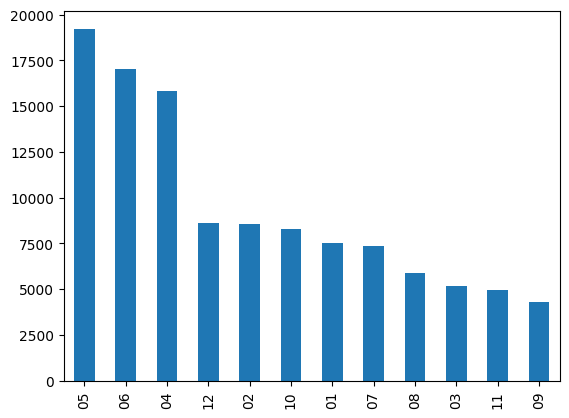

In [47]:
df[filt]['FECHA_EMISION'].dt.strftime('%m').value_counts().plot(kind='bar')

<Axes: >

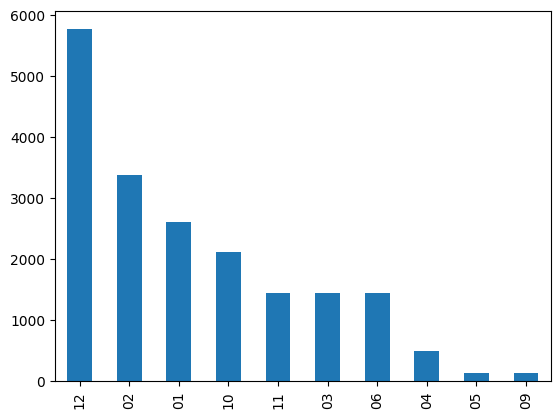

In [48]:
filt =df['DESTINO'].str.contains('JORNAL', na=False)
df[filt]['FECHA_EMISION'].dt.strftime('%m').value_counts().plot(kind='bar')

In [49]:
df.describe()

,PLAZO,MONTO,SCAPITAL,TASA_EFECTIVA_ANUAL
count,3.507087e+06,3.507087e+06,3.507087e+06,3.507087e+06
mean,2.772004e+02,2.471049e+04,3.083210e+03,1.599618e-03
std,1.024200e+02,3.001327e+04,1.794570e+04,2.190571e-01
min,5.000000e+00,5.000000e+02,0.000000e+00,0.000000e+00
25%,1.800000e+02,8.000000e+03,0.000000e+00,0.000000e+00
50%,3.000000e+02,1.000000e+04,0.000000e+00,0.000000e+00
75%,3.600000e+02,3.000000e+04,0.000000e+00,0.000000e+00
max,1.080000e+03,2.000000e+05,2.000000e+05,3.000000e+01


<Axes: >

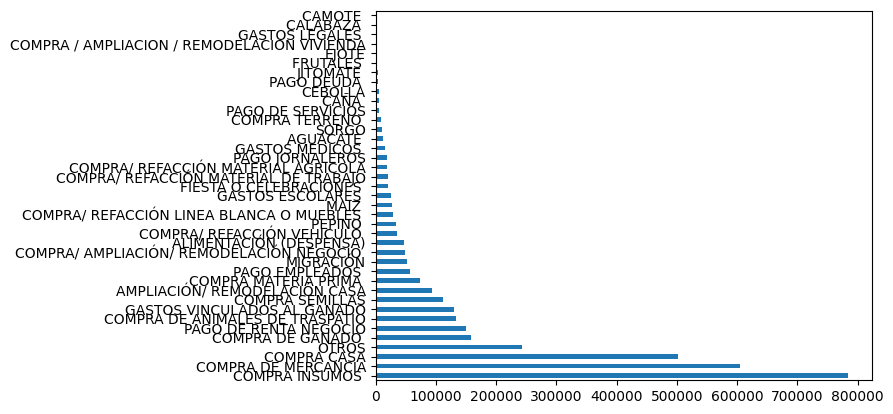

In [50]:
df['DESTINO'].value_counts().plot(kind='barh')

<Axes: >

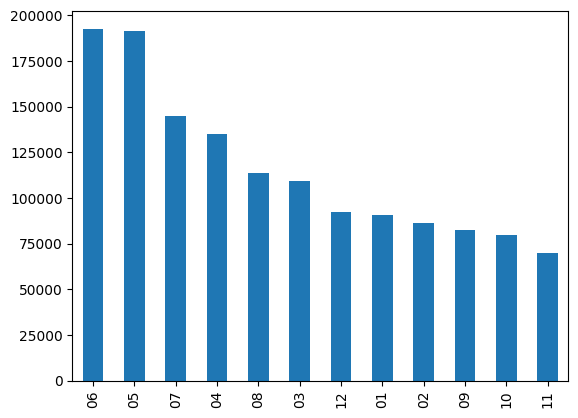

In [51]:
filt =(df['DESTINO'].str.contains('INSUMOS', na=False)) | (df['DESTINO'].str.contains('MERCANCIA', na=False))
df[filt]['FECHA_EMISION'].dt.strftime('%m').value_counts().plot(kind='bar')

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3507087 entries, 0 to 3507086
Data columns (total 11 columns):
 #   Column                Dtype         
---  ------                -----         
 0   FECHA_EMISION         datetime64[ns]
 1   FECHA_ULTIMO_PAGO     datetime64[ns]
 2   PLAZO                 float64       
 3   PRODUCTO              object        
 4   DESTINO               object        
 5   MONTO                 float64       
 6   SCAPITAL              float64       
 7    TASA_EFECTIVA_ANUAL  float64       
 8    COBRA_IVA            object        
 9   NOM_ACT               object        
 10  DACTIVIDAD            object        
dtypes: datetime64[ns](2), float64(4), object(5)
memory usage: 294.3+ MB


In [61]:
query="""
SELECT strftime('%m', '2018-08-01') Mes FROM df limit 1
"""
q1=sqldf(query)
q1.sample()

,Mes
0,08


In [64]:
query="""
SELECT strftime('%m', FECHA_EMISION) MES, COUNT(*) NUM FROM df 
WHERE  DESTINO LIKE '%MERCANCIA%'
OR DESTINO LIKE '%INSUMO%'
GROUP BY 1

"""
q1=sqldf(query)
q1.sample(10)

,MES,NUM
4,05,191217
11,12,92472
8,09,82375
1,02,86308
2,03,109385
10,11,69990
0,01,90426
7,08,113873
3,04,135059
6,07,144660


01    1
02    1
03    1
04    1
05    1
06    1
07    1
08    1
09    1
10    1
11    1
12    1
Name: MES, dtype: int64

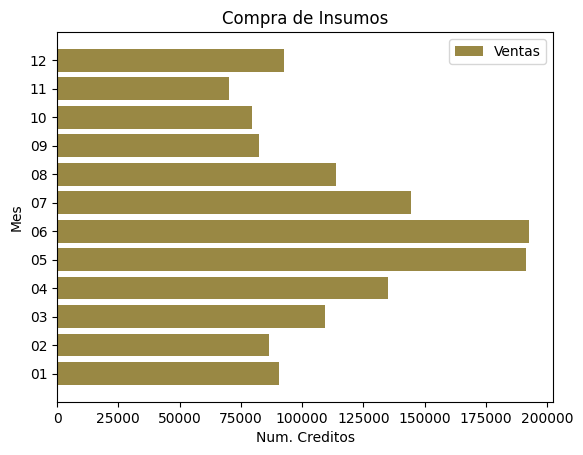

In [68]:
plt.barh(q1['MES'], q1['NUM'], color="#998844", label="Ventas")
plt.legend()
plt.title("Compra de Insumos")
plt.xlabel("Num. Creditos")
plt.ylabel("Mes")
#q1.plot(kind='barh')
plt.show()

<Axes: >

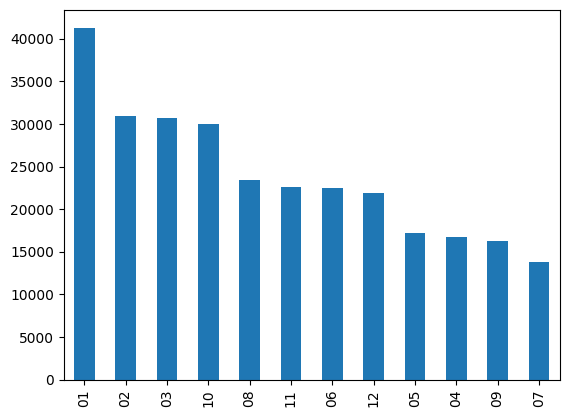

In [69]:
filt =df['DESTINO'].str.contains('GANADO', na=False)
df[filt]['FECHA_EMISION'].dt.strftime('%m').value_counts().plot(kind='bar')